# **Stock Market Analysis**

**Author**: Dhaara Thakkar

## 📌 Project Objective

## 🧾 Step 1: Import Libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

## 📂 Step 2: Load the Dataset

In [7]:
tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOGL']
data = yf.download(tickers, start='2025-03-01', end='2025-05-31')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


## Step 3: Dataset Overview

In [9]:
data.shape

(63, 20)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2025-03-03 to 2025-05-30
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, AAPL)    63 non-null     float64
 1   (Close, GOOGL)   63 non-null     float64
 2   (Close, MSFT)    63 non-null     float64
 3   (Close, NFLX)    63 non-null     float64
 4   (High, AAPL)     63 non-null     float64
 5   (High, GOOGL)    63 non-null     float64
 6   (High, MSFT)     63 non-null     float64
 7   (High, NFLX)     63 non-null     float64
 8   (Low, AAPL)      63 non-null     float64
 9   (Low, GOOGL)     63 non-null     float64
 10  (Low, MSFT)      63 non-null     float64
 11  (Low, NFLX)      63 non-null     float64
 12  (Open, AAPL)     63 non-null     float64
 13  (Open, GOOGL)    63 non-null     float64
 14  (Open, MSFT)     63 non-null     float64
 15  (Open, NFLX)     63 non-null     float64
 16  (Volume, AAPL)   63 non-null     int64  
 17

In [11]:
data.head().style

In [12]:
data.isnull().sum()

Price   Ticker
Close   AAPL      0
        GOOGL     0
        MSFT      0
        NFLX      0
High    AAPL      0
        GOOGL     0
        MSFT      0
        NFLX      0
Low     AAPL      0
        GOOGL     0
        MSFT      0
        NFLX      0
Open    AAPL      0
        GOOGL     0
        MSFT      0
        NFLX      0
Volume  AAPL      0
        GOOGL     0
        MSFT      0
        NFLX      0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
data['Close']

Ticker,AAPL,GOOGL,MSFT,NFLX
Date,,,,
2025-03-03,237.718262,166.817871,387.778076,973.700012
2025-03-04,235.621017,170.723373,387.897858,972.580017
2025-03-05,235.431274,172.820969,400.285126,990.919983
2025-03-06,235.021805,172.151733,396.162720,906.359985
2025-03-07,238.756912,173.660004,392.589264,891.109985
...,...,...,...,...
2025-05-23,195.270004,168.470001,450.179993,1185.390015
2025-05-27,200.210007,172.899994,460.690002,1211.569946
2025-05-28,200.419998,172.360001,457.359985,1208.550049


In [15]:
data.xs('AAPL', level='Ticker', axis=1)

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-03-03,237.718262,243.710404,235.800778,241.473332,47184000
2025-03-04,235.621017,239.755610,234.372654,237.398700,53798100
2025-03-05,235.431274,236.240211,228.929790,235.111686,47227600
2025-03-06,235.021805,237.548490,232.854649,234.132971,45170400
2025-03-07,238.756912,241.053888,234.452544,234.802092,46273600
...,...,...,...,...,...
2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900
2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500
2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700


In [16]:
daily_returns = data['Close'].pct_change()

In [17]:
daily_returns_percent = daily_returns.applymap(lambda x: f"{x*100:.2f}%" if pd.notnull(x) else "")

C:\Users\Admin\AppData\Local\Temp\ipykernel_25900\2554280346.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  daily_returns_percent = daily_returns.applymap(lambda x: f"{x*100:.2f}%" if pd.notnull(x) else "")


In [37]:
daily_returns_percent

Ticker,AAPL,GOOGL,MSFT,NFLX
Date,,,,
2025-03-03,,,,
2025-03-04,-0.88%,2.34%,0.03%,-0.12%
2025-03-05,-0.08%,1.23%,3.19%,1.89%
2025-03-06,-0.17%,-0.39%,-1.03%,-8.53%
2025-03-07,1.59%,0.88%,-0.90%,-1.68%
...,...,...,...,...
2025-05-23,-3.02%,-1.40%,-1.03%,-0.22%
2025-05-27,2.53%,2.63%,2.33%,2.21%
2025-05-28,0.10%,-0.31%,-0.72%,-0.25%


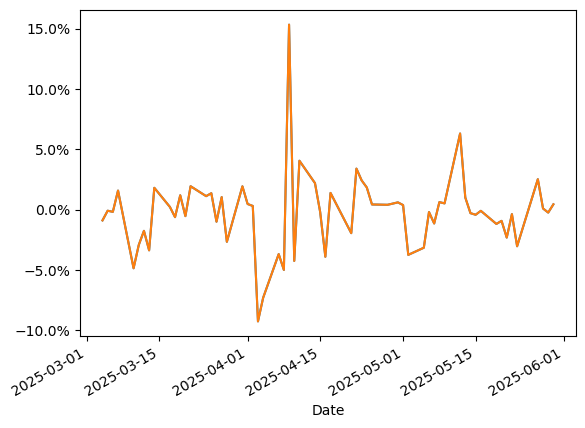

In [77]:
import matplotlib.ticker as mtick

ax = daily_returns['AAPL'].plot()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

## 📊 Step 4: Results

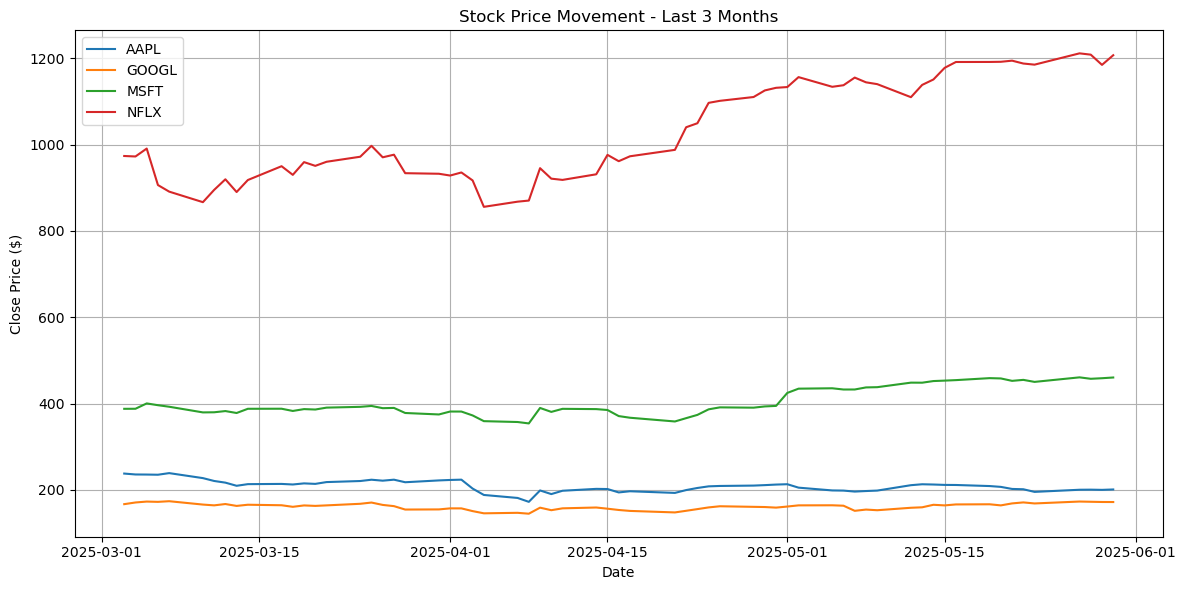

In [79]:
plt.figure(figsize=(12, 6))
for stock in ['AAPL', 'GOOGL', 'MSFT', 'NFLX']:
    plt.plot(data.index, data['Close', stock], label=stock)

plt.title('Stock Price Movement - Last 3 Months')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 **Insights**:

- All four tech stocks (AAPL, GOOGL, MSFT, NFLX) showed moderate fluctuations over the 3-month period.

- **AAPL** and **MSFT** displayed relatively stable upward trends, while **NFLX** showed more volatility.


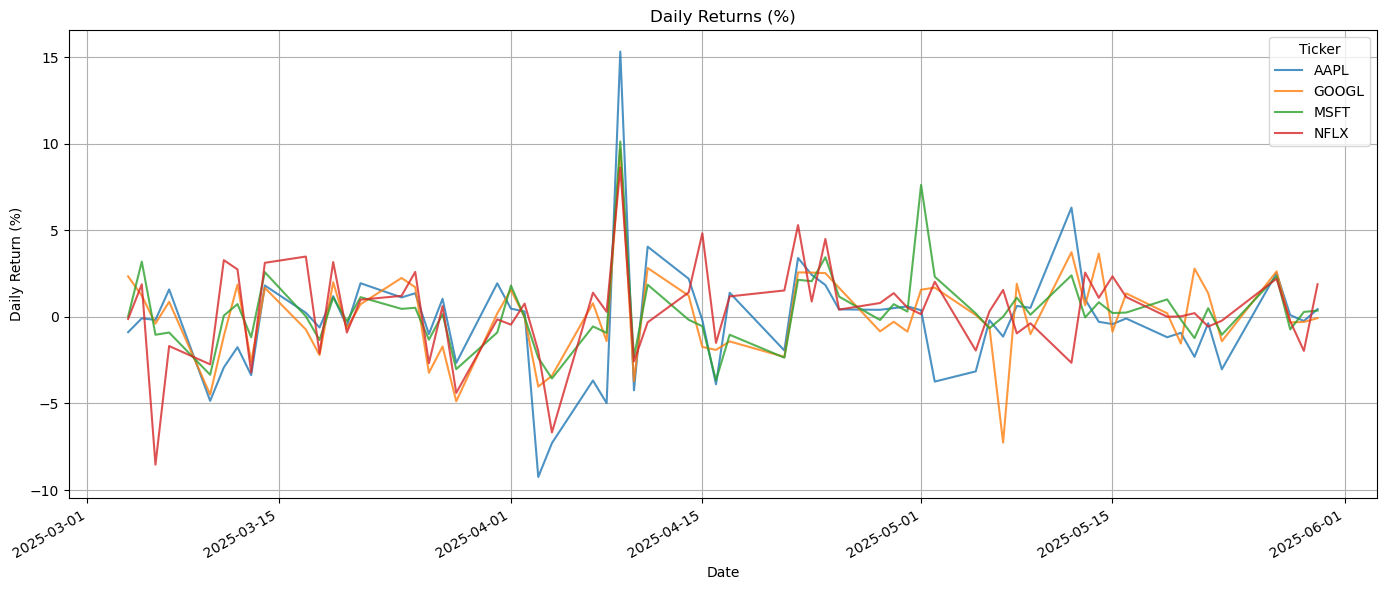

In [60]:
daily_returns.plot(figsize=(14, 6), alpha=0.8)
plt.title('Daily Returns (%)')
plt.ylabel('Daily Return (%)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 **Insights**:

- Daily returns highlight short-term price volatility.

- All stocks experienced occasional sharp spikes, indicating reaction to market events or earnings.

- **NFLX** had more erratic swings, suggesting higher short-term risk.

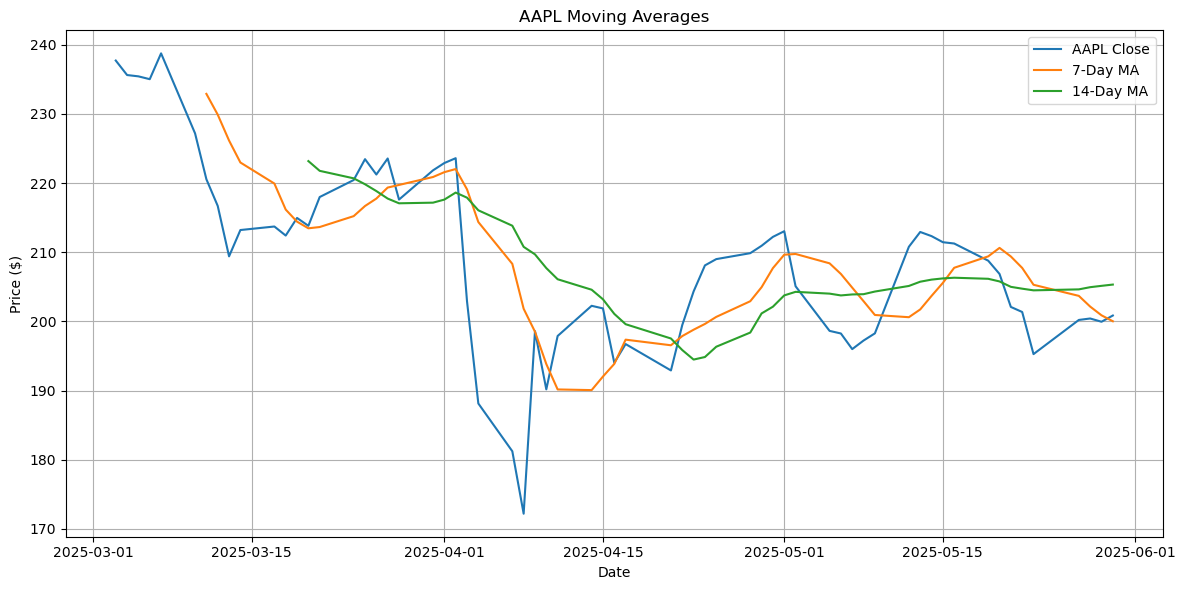

In [45]:
# Example: AAPL with 7-day and 14-day MA
aapl_close = data['Close', 'AAPL']
ma7 = aapl_close.rolling(window=7).mean()
ma14 = aapl_close.rolling(window=14).mean()

plt.figure(figsize=(12, 6))
plt.plot(aapl_close, label='AAPL Close')
plt.plot(ma7, label='7-Day MA')
plt.plot(ma14, label='14-Day MA')
plt.title('AAPL Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 **Insights**:

- The 7-day and 14-day moving averages smooth out daily noise.

- Periods where the short MA crosses above the long MA suggest bullish signals, and vice versa.

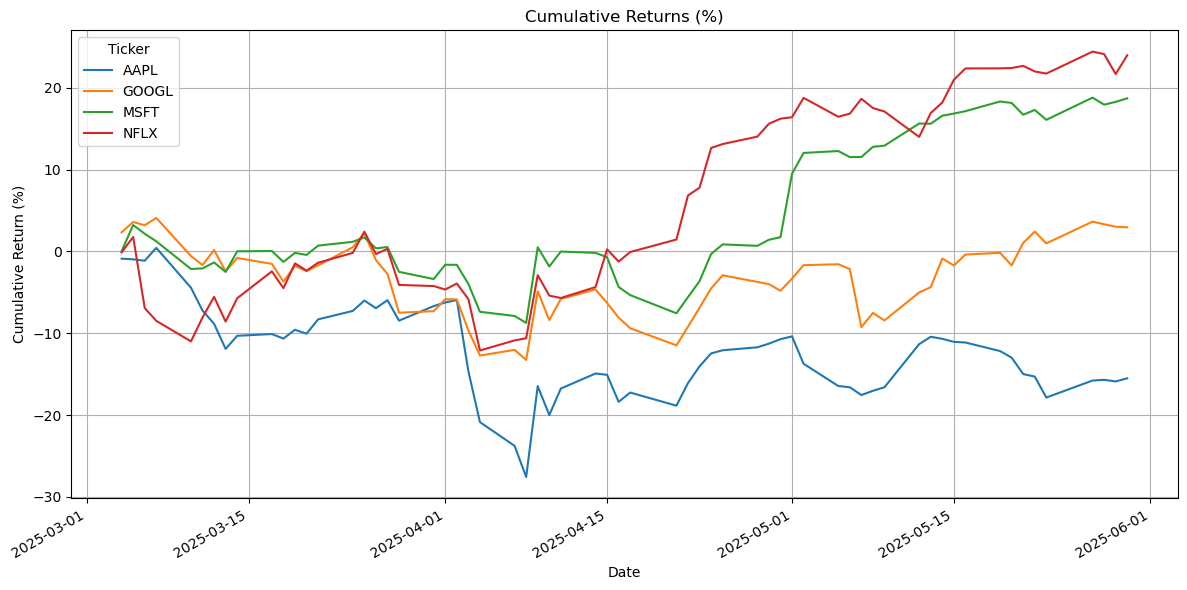

In [47]:
cumulative_returns = (1 + daily_returns / 100).cumprod() - 1  # final in %
cumulative_returns *= 100

cumulative_returns.plot(figsize=(12, 6))
plt.title('Cumulative Returns (%)')
plt.ylabel('Cumulative Return (%)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 **Insights**:

- Cumulative returns illustrate overall performance during the period.

- Stocks like MSFT and AAPL showed consistent gains.

- NFLX underperformed comparatively, with choppier cumulative returns.

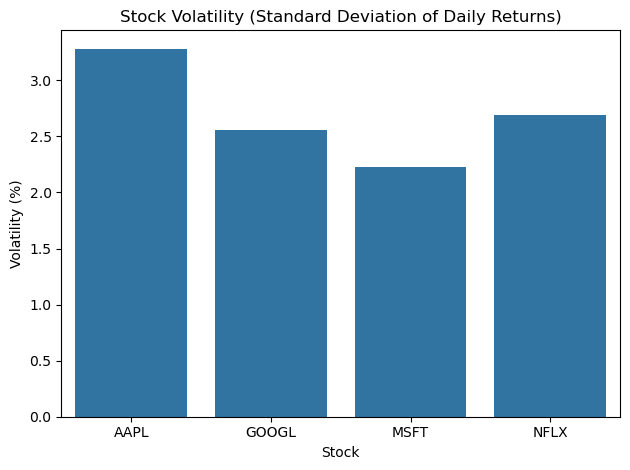

In [49]:
volatility = daily_returns.std()

sns.barplot(x=volatility.index, y=volatility.values)
plt.title('Stock Volatility (Standard Deviation of Daily Returns)')
plt.ylabel('Volatility (%)')
plt.xlabel('Stock')
plt.tight_layout()
plt.show()

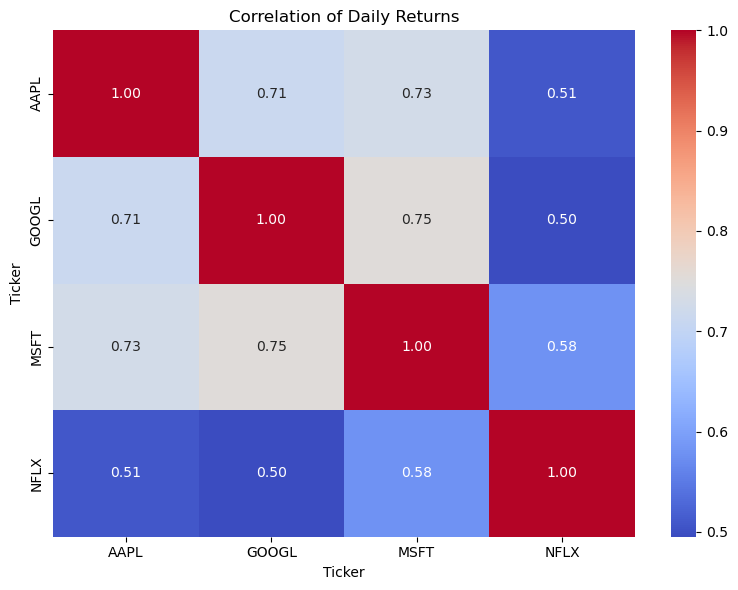

In [51]:
correlation = daily_returns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Daily Returns')
plt.tight_layout()
plt.show()